In [1]:
import pandas as pd
%matplotlib inline
from scipy import stats

In [111]:
######################################################
########--------LDpred_p1.0000e+00.txt--------########
######################################################

########--------Cleaning data--------########

df_0 = pd.read_table("/oak/stanford/groups/euan/projects/risk_scores/step3_jack/all_chromosomes/step3_ukbb_random_out_LDpred_p1.0000e+00.txt", 
                    sep = ' ')


In [112]:
#df_0.head()
#df_0.iloc[:,[1]] #To check/display first column
#list(df_0) # Check the colnames
#df_0.shape # Check number of rows, columns. 13099 rows
#df_0_full.info() # Same as str() in r

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2defbe79b0>]],
      dtype=object)

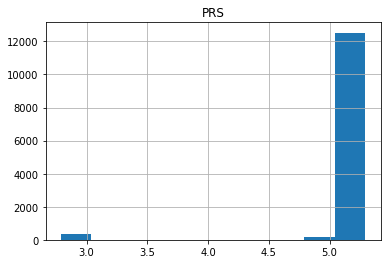

In [113]:
###---Histogram without outliers removed---###
df_0.hist(column='PRS')

In [114]:
# Check number of patients with PRS ~ 3
df_0_filtered = df_0[df_0.PRS <4] # Filter 
df_0_filtered.head()
df_0_filtered.shape #378 outliers (2.9%)

(378, 3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2defc24c50>]],
      dtype=object)

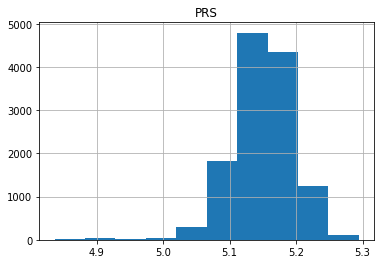

In [115]:
# Create df without outlying patients
df_0_full = df_0[df_0.PRS >3.5]
df_0_full.hist(column='PRS')

In [116]:
# Normalise data 
df_0_full["z_score"] = stats.zscore(df_0_full["PRS"], axis=0)
df_0_full.head()
#df_0_full.loc["z_score"] = stats.zscore(df_0_full["PRS"], axis=0)


/scratch/users/jackos/Aanaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,"IID,",PRS,Unnamed: 2,z_score
0,"1001207,",5.160882,NaN,0.238044
1,"1001732,",5.142467,NaN,-0.155106
2,"1001874,",5.125001,NaN,-0.527995
3,"1001964,",5.153411,NaN,0.078542
4,"1004458,",5.161639,NaN,0.254205


In [117]:
#mean = df_0_full['PRS'].mean()
#sd = df_0_full['PRS'].std()
#df_0_full['z_score1'] = (df_0_full['PRS'] - mean)/sd
#df_0_full.head() # This cell of code manually calculates the z score, it gives the same result so no need to repeat is as well as above

In [118]:
df_0_full = df_0_full[['IID,', 'PRS', 'z_score']] # Remove NaN column
df_0_full = df_0_full.rename(index=str, columns={'IID,': "IID"}) #Rename colname
df_0_full.head()

,IID,PRS,z_score
0,"1001207,",5.160882,0.238044
1,"1001732,",5.142467,-0.155106
2,"1001874,",5.125001,-0.527995
3,"1001964,",5.153411,0.078542
4,"1004458,",5.161639,0.254205


In [119]:
#df_0_full.to_csv = ("/oak/stanford/groups/euan/projects/risk_scores/step3_jack/all_chromosome/p1.0000e+00") # This isn't working currently


In [120]:
# Merge df_0_full df with phenotype file 
# Get rid of comma in IID (cells and column, but could concat/merge without changing column)
df_0_full.IID.replace(",", "", regex=True, inplace=True)
df_0_full.head()
df_0_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12721 entries, 0 to 13098
Data columns (total 3 columns):
IID        12721 non-null object
PRS        12721 non-null float64
z_score    12721 non-null float64
dtypes: float64(2), object(1)
memory usage: 397.5+ KB


In [121]:
# Convert from object to numeric
df_0_full['IID'] = pd.to_numeric(df_0_full["IID"]) # Convert from pandas object to numeric 
df_0_full.head()
df_0_full.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12721 entries, 0 to 13098
Data columns (total 3 columns):
IID        12721 non-null int64
PRS        12721 non-null float64
z_score    12721 non-null float64
dtypes: float64(2), int64(1)
memory usage: 397.5+ KB


In [122]:
# Read in Phenotype file
phen = pd.read_table("/oak/stanford/groups/euan/projects/risk_scores/step3_jack/all_chromosomes/phenotype_file.tsv", sep='\t')
phen.info() # 17365 rows
phen.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17365 entries, 0 to 17364
Data columns (total 2 columns):
IID     17365 non-null int64
PHEN    17365 non-null int64
dtypes: int64(2)
memory usage: 271.4 KB


,IID,PHEN
0,2365537,0
1,5270945,0
2,2516596,1
3,2807764,0
4,2350324,0


In [123]:
# Merge 
prs_phen = pd.merge(df_0_full, phen, on ='IID')
prs_phen.head()

,IID,PRS,z_score,PHEN
0,1001207,5.160882,0.238044,1
1,1001732,5.142467,-0.155106,0
2,1001874,5.125001,-0.527995,0
3,1001964,5.153411,0.078542,0
4,1004458,5.161639,0.254205,0


In [125]:
########--------Visulising cases vs. controls--------########
# Histograms
#prs_phen.hist(column='PRS', by='PHEN') # Need to put these on the same plot with different colours. To do this need to filter the above df into two dfs where phen = 1 or phen = 0 

# Filter patients
phen1 = prs_phen[prs_phen.PHEN == 1]
phen1 = phen1[["PRS"]]
phen1.head()

phen0 = prs_phen[prs_phen.PHEN == 0]
phen0 = phen0[["PRS"]]
phen0.head()


,PRS
1,5.142467
2,5.125001
3,5.153411
4,5.161639
5,5.142950


In [128]:
import matplotlib.pyplot as plt

ValueError: cannot copy sequence with size 11406 to array axis with dimension 1

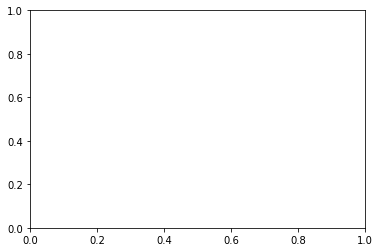

In [129]:
plt.hist([phen0, phen1], stacked=True) # This is not working for some reason